### Practical 26

### Create a Project using K-Means clustering for obtaining optimal no. of clusters and their centroids on live dataset from kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("D:/ML Dataset/Live.csv")
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [24]:
dataset.drop(['Column1','Column2','Column3','Column4'],axis=1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [36]:
x = dataset.iloc[:,[3,4]].values

In [37]:
#from sklearn. compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
#x = np.array(ct.fit_transform(x))
#print(x)

In [38]:
from sklearn.cluster import KMeans
wcss_list = []

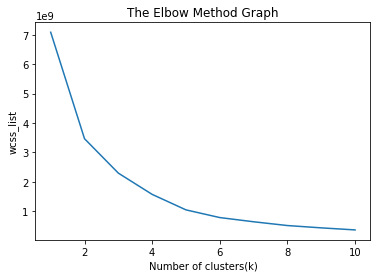

In [39]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 3)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_) # inertia_ is a pre-defied attribute of KMeans
plt.plot(range(1,11),wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [40]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss_list, curve = "convex", direction = 'decreasing')
kl.elbow
# Since the elbow point is at 3. So the number of clusters here will be 3.

3

In [41]:
# Training the K-means model on a dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)

#we are going to use the fit predict method that returns for each observation 

y_predict = kmeans.fit_predict(x)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

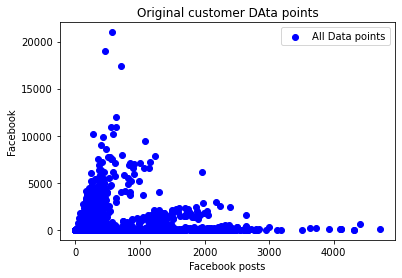

In [42]:
# Visualizing Original Data Points without clustering

plt.scatter(x[:,0],x[:,1],c="blue", label="All Data points")
plt.title('Original customer DAta points')
plt.xlabel('Facebook posts')
plt.ylabel('Facebook')
plt.legend()
plt.show()

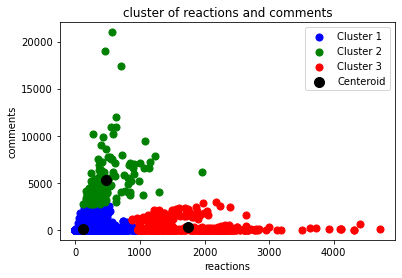

In [43]:
# For first cluster

plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s=50, c='blue', label='Cluster 1')

# For second cluster

plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s=50, c='green', label='Cluster 2')

# For third cluster

plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s=50, c='red', label='Cluster 3')

# Plot the centroid. This time we're going to use the kmeans.Cluster_centers_
# attribute that returns here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'black', label='Centeroid' )
plt.title("cluster of reactions and comments")
plt.xlabel("reactions")
plt.ylabel("comments")
plt.legend()
plt.show()